In [269]:
# This code will implement a baseline, very simple, Perceptron to classify points in 2D space 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
# Very simple neural network that works on classifying things from the wheat and seeds dataset 
"""In general there are X stages we go through to make a fully functional neural network:
1) Initialise the network 
2) Forward Propagate
3) Back Propagate the error
4) Train Network (i.e. update the weights with training data)
5) Predict on test data
"""


'In general there are X stages we go through to make a fully functional neural network:\n1) Initialise the network \n2) Forward Propagate\n3) Back Propagate the error\n4) Train Network (i.e. update the weights with training data)\n5) Predict on test data\n'

In [6]:
# define input features
np.random.seed(2)
num = 10000
# Creating a random array of x , y points 
x = np.random.randn(num)*50
y = np.random.randn(num)*50
# Defining a cut off line to split the points into two sections 
x_line = np.linspace(-150,150,x.size)
y_line = (1.5*x_line-25)

In [7]:
# Generating a third column based on the position of the points on the 2D grid
z = np.zeros((len(x),1))
z[(1.5*x-25 > y)] = 1

In [8]:
# Concatenating x,y,z into the fully labelled dataset
x = x.reshape(x.size,1)
y = y.reshape(y.size,1)
z = z.reshape(z.size,1)
data = np.concatenate([x,y,z],axis=1)
# Extracting test data from the full dataset
# Specifying a percentage of the full dataset
train_perc = 0.1

train_data = data[0:round(len(data)*train_perc/100),:]
# Extracting test data
test_data = data[round(len(data)*train_perc/100)::,:]

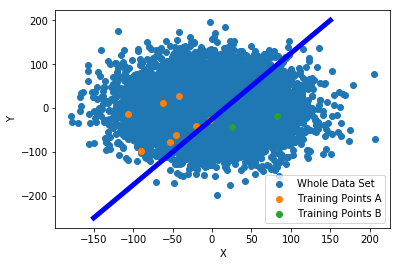

In [9]:
# Plotting test data
td1 = train_data[(train_data[:,2]==0)] 
td2 = train_data[(train_data[:,2]==1)] 
plt.scatter(x,y,label='Whole Data Set')
plt.scatter(td1[:,0],td1[:,1],label='Training Points A')
plt.scatter(td2[:,0],td2[:,1],label='Training Points B')
plt.plot(x_line,y_line,'b',linewidth=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [10]:
# Extracting input features from test data (i.e. x,y locations)
input_feats = train_data[:,(0,1)].reshape(2,len(train_data))
print (input_feats.shape)
print (input_feats)

(2, 10)
[[ -20.83789237  -40.40893038   -2.81334136  -26.50126648 -106.80980478
   -14.52013077   82.01354042  -17.76163858  -89.67177926  -98.25276882]
 [ -42.08736828   27.20167987   25.14407086  -43.45353135  -62.26440433
    11.01054377  -52.89761094  -78.21391593  -45.45038075  -62.07678387]]


In [11]:
# Defining expected outputs (i.e. 0/1 depending on where the points lie)
target = train_data[:,2]
target = target.reshape(1,input_feats.shape[1])
print (target.shape)
print (target)

(1, 10)
[[0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]]


In [12]:
# Create weights

def init_network(structure):
    
    np.random.seed(1)
    
    """Takes in 4 variables: Number of inputs, number of neurons in hidden layer 1, number of neurons in hidden
       layer 2, number of outputs and creates the weights and bias matrices"""
    layers = len(structure)
    weights = []
    biases = []
    
    for i in range(1,layers):
        weights.append([np.random.randn(structure[i], structure[i-1])])
        biases.append([np.random.randn(structure[i])])

        # Fixing shapes of arrays in the list 
        weights[i-1] = np.array(weights[i-1]).reshape(structure[i], structure[i-1])
        biases[i-1] = np.array(biases[i-1]).reshape(structure[i],1)

    print ("WEIGHTS :")
    print (weights)
    print ("BIASES : ")
    print (biases)
    
    return (weights, biases)

In [13]:
n_in = 2
n_hid = 5
n_hid2 = 3
n_out = 1

structure = [n_in, n_hid, n_hid2, n_out]

weights, biases = init_network(structure)

WEIGHTS :
[array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038]]), array([[-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595],
       [-0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547]]), array([[-0.84520564, -0.67124613, -0.0126646 ]])]
BIASES : 
[array([[ 1.46210794],
       [-2.06014071],
       [-0.3224172 ],
       [-0.38405435],
       [ 1.13376944]]), array([[-0.69166075],
       [-0.39675353],
       [-0.6871727 ]]), array([[-1.11731035]])]


In [14]:
biases[0].shape

(5, 1)

In [15]:
weights[0].shape

(5, 2)

In [16]:
# Sigmoid activation function 
def sigmoid(X): 
    out = 1/(1+np.exp(-X))
    return out 

In [17]:
# Derivative of sigmoid activation function (used in the gradient descent back propagation)
def sigmoid_der(X):  
    out = sigmoid(X)*(1-sigmoid(X))
    return out

In [18]:
def feed_forward(input_feats, weights, biases, structure):
    
    """Feed forward part of the NN"""
    layers = len(structure)
    num = input_feats.shape[1]
    a = []
    z = []
    layer_output = input_feats
    for i in range(0,layers-1):
        z.append(np.dot(weights[i],layer_output)+biases[i])
        # Fixing shapes of arrays in the list 
        z[i] = np.array(z[i]).reshape(structure[i+1],num)
        a.append(sigmoid(z[i]))
        # Fixing shapes of arrays in the list 
        a[i] = np.array(a[i]).reshape(structure[i+1],num)
        layer_output = a[i]
    return (layer_output,a,z)

    

In [19]:
y_hat, a, z = feed_forward(input_feats,weights, biases, structure)

In [20]:
def compute_cost(a, target):
    cost = np.sum(y_hat-target)
    return cost

In [30]:
print (a[0].shape)
print (a[1].shape)
print (a[2].shape)

(5, 10)
(3, 10)
(1, 10)


In [1]:
def back_propagation(a, z, target, input_feats,structure):
    
    """Implementing the backpropagation"""
    for i in reversed(range(0,len(structure))):
        y_hat = a[i]
        error = y_hat - target 
    
        deriv = error * sigmoid_der(a)
    
        # Calculating the error vector 
        error = y_hat - target
        # Calculating deriv
        deriv = (error * sigmoid_der(z))

        # Calculating dError/dWeights
        #dE_dw = np.dot(input_feats.T,deriv)
        # Updating weights 
        #weights_run -=(l_rate * dE_dw)

In [2]:
back_propagation(a, z, target, input_feats,structure)

NameError: name 'a' is not defined

In [464]:
def train(input_feats, weights, bias, target, l_rate, epoch):
    
    cost = np.zeros((epoch,1))
    
    weights_run = weights
    bias_run = bias
    
    for epoch in np.arange(0,epoch):
        # Feed forward 
        y_hat, a, z = feed_forward(test_input,weights, biases, structure)       
        # Calculating cost value for the network 
        cost = compute_cost(y_hat, target)
        # Calculating the error vector 
        error = y_hat - target
        # Calculating deriv
        deriv = (error * sigmoid_der(z))
        # Calculating dError/dWeights
        dE_dw = np.dot(input_feats.T,deriv)
        # Updating weights 
        weights_run -=(l_rate * dE_dw)
        # Updating bias
        for i in deriv:
            bias_run -= l_rate * i
        
    return cost, weights_run, bias_run

In [95]:
epoch = 1000
epochs = range(epoch)
cost, weights_run , bias_run = train((input_feats), weights, biases, target, 0.001, epoch)

plt.scatter(epochs,cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')

ValueError: setting an array element with a sequence.

In [13]:
epoch = 10000
epochs = range(epoch)
# Normalising inputs to ensure stability
norm_input = (input_feats)/np.max(input_feats)
cost, weights_run , bias_run = train(norm_input, weights, bias, target, 0.001, epoch)

plt.scatter(epochs,cost)
plt.xlabel('Epoch')
plt.ylabel('Cost')

NameError: name 'bias' is not defined

In [14]:
print (weights_run)
print (bias_run)

NameError: name 'weights_run' is not defined

In [15]:
# Testing on data

In [16]:
test_row = 2780
test = test_data[test_row,:]
test_point = test_data[test_row,(0,1)] 
print ("Test point = (%s, %s), Expected output = %s" %(test_data[test_row,0],test_data[test_row,1],test_data[test_row,2]))

Test point = (-38.02340888056949, 32.96463972133629), Expected output = 0.0


In [17]:
# test_features 
test_feats = test_data[:,(0,1)]
norm_test_feats = test_feats/np.max(test_feats)
test_target = test_data[:,2]


In [18]:
# Forward propagating
a = np.dot(norm_test_feats, weights_run) + bias_run

# Activation function 
z_train = sigmoid(a)

NameError: name 'weights_run' is not defined

In [19]:
test_target = test_target.reshape(len(test_feats),1)
#z_train = z_train.reshape(9000,1)
print (np.concatenate([test_target,z_train,test_target - z_train],axis=1))

NameError: name 'z_train' is not defined

In [20]:
round_train = np.round(z_train)
error = (test_target - z_train)
round_error = (np.round(error))
MSE = np.sum(pow(round_error,2))/len(test_data)
MAE = np.mean(abs(round_error))
print ("MSE = %s"%(MSE))
print ("MAE = %s"%(MAE))

NameError: name 'z_train' is not defined

In [21]:
# Getting correct predictions
correct = test_target[(test_target==round_train)]
incorrect = test_target[(test_target!=round_train)]
accuracy = (len(correct)/len(test_target))*100
print ("Accuracy = %s percent"%(accuracy))

NameError: name 'round_train' is not defined